In [ ]:
# Calling the Necessary Libararies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest

warnings.filterwarnings('ignore')
print("Ignoring all the warnings -- True")

In [12]:
label_encoder = LabelEncoder()
for feature in features:
    df[feature] = label_encoder.fit_transform(df[feature].astype(str))

In [13]:
male_data = df[df['Gender'] == 0]
female_data = df[df['Gender'] == 1]

In [14]:
X_male = male_data.drop(columns=[target])
y_male = male_data[target]
X_female = female_data.drop(columns=[target])
y_female = female_data[target]

X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.10)
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.10)

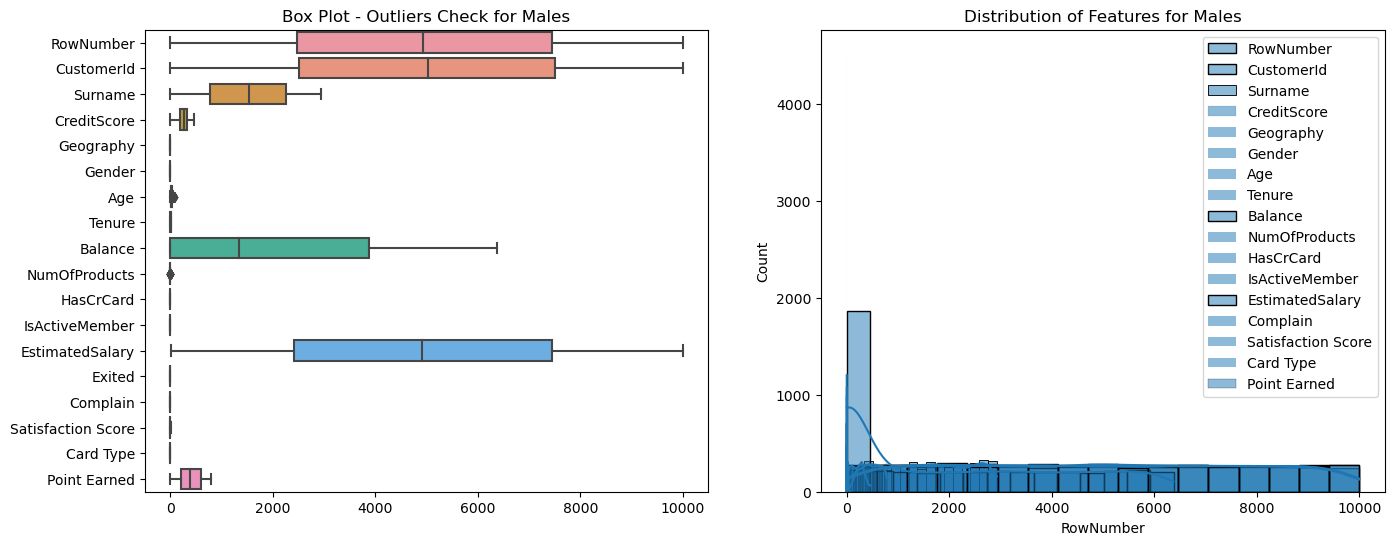

Normality Check and Outlier Counts for Males:
╒════════════════════╤═════════════════════════════════════════════════════════╤══════════════════╕
│ Feature            │ Result                                                  │   Outliers Count │
╞════════════════════╪═════════════════════════════════════════════════════════╪══════════════════╡
│ RowNumber          │ Data is scaled normally and doesn't have any outliers   │                0 │
├────────────────────┼─────────────────────────────────────────────────────────┼──────────────────┤
│ CustomerId         │ Data is scaled normally and doesn't have any outliers   │                0 │
├────────────────────┼─────────────────────────────────────────────────────────┼──────────────────┤
│ Surname            │ Data is scaled normally and doesn't have any outliers   │                0 │
├────────────────────┼─────────────────────────────────────────────────────────┼──────────────────┤
│ CreditScore        │ Data is scaled normally and doe

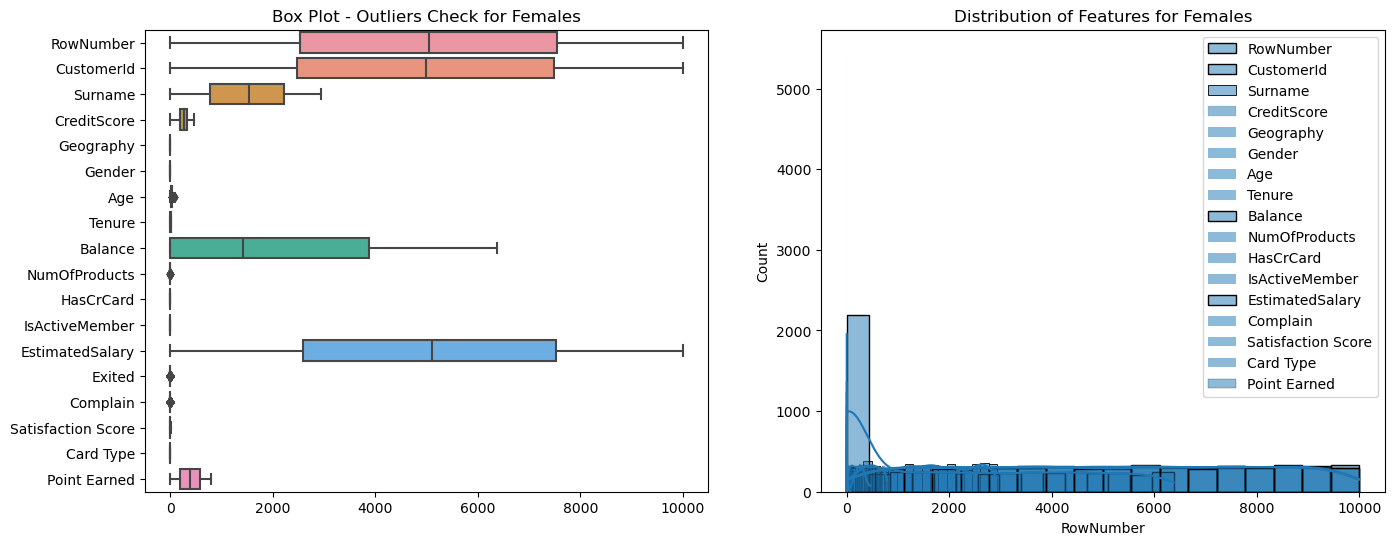

Normality Check and Outlier Counts for Females:
╒════════════════════╤═════════════════════════════════════════════════════════╤══════════════════╕
│ Feature            │ Result                                                  │   Outliers Count │
╞════════════════════╪═════════════════════════════════════════════════════════╪══════════════════╡
│ RowNumber          │ Data is scaled normally and doesn't have any outliers   │                0 │
├────────────────────┼─────────────────────────────────────────────────────────┼──────────────────┤
│ CustomerId         │ Data is scaled normally and doesn't have any outliers   │                0 │
├────────────────────┼─────────────────────────────────────────────────────────┼──────────────────┤
│ Surname            │ Data is scaled normally and doesn't have any outliers   │                0 │
├────────────────────┼─────────────────────────────────────────────────────────┼──────────────────┤
│ CreditScore        │ Data is scaled normally and d

In [15]:

def check_outliers_and_distribution(data, title):
    plt.figure(figsize=(16, 6))

    # Checking for outliers using box plots as visuals are better for making a thing understand
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data, orient='h')
    plt.title(f'Box Plot - Outliers Check for {title}')

    # Plotting feature distributions for better understanding
    plt.subplot(1, 2, 2)

    # Creating a list to store the results for better understanding
    results = []

    for feature in features:
        sns.histplot(data=data[feature], kde=True, label=feature)

        # Checking for normality (standard distribution) and outliers for better analysis and interpretation
        normality_results = {}
        has_left_outliers = False
        has_right_outliers = False

        z_scores = stats.zscore(data[feature])
        left_outliers = any(z_scores < -3)  
        right_outliers = any(z_scores > 3)  

        if left_outliers and right_outliers:
            normality_result = "Data is not scaled normally and has both left and right tail outliers"
        elif left_outliers:
            normality_result = "Data is not scaled normally but has left tail outliers"
        elif right_outliers:
            normality_result = "Data is not scaled normally but has right tail outliers"
        else:
            normality_result = "Data is scaled normally and doesn't have any outliers"

        normality_results[feature] = normality_result

        # Counting the number of outliers for each feature for better analysis
        outliers_count = len(data[z_scores > 3]) + len(data[z_scores < -3])
        results.append([feature, normality_result, outliers_count])

    plt.legend()
    plt.title(f'Distribution of Features for {title}')
    plt.show()

    # Printing results in a tabular format for better understanding
    print(f"Normality Check and Outlier Counts for {title}:")
    print(tabulate(results, headers=["Feature", "Result", "Outliers Count"], tablefmt="fancy_grid"))

# Checking outliers and distributions for male_data
check_outliers_and_distribution(male_data, "Males")

# Checking outliers and distributions for female_data
check_outliers_and_distribution(female_data, "Females")

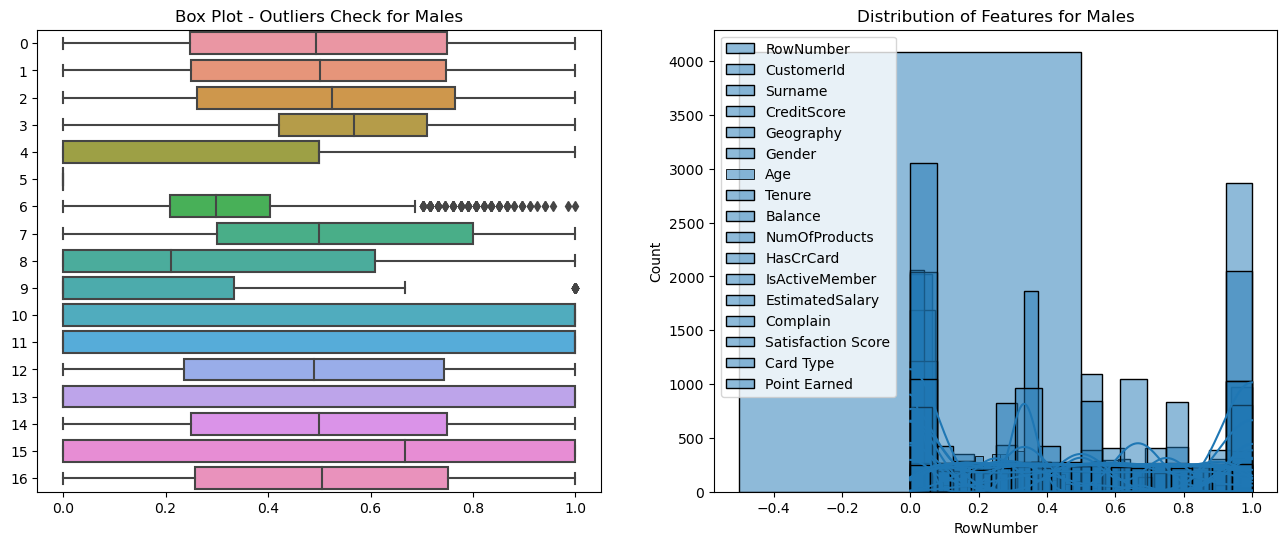

Normality Check and Outlier Counts for Males:
╒════════════════════╤═════════════════════════════════════════════════════════╤══════════════════╕
│ Feature            │ Result                                                  │   Outliers Count │
╞════════════════════╪═════════════════════════════════════════════════════════╪══════════════════╡
│ RowNumber          │ Data is scaled normally and doesn't have any outliers   │                0 │
├────────────────────┼─────────────────────────────────────────────────────────┼──────────────────┤
│ CustomerId         │ Data is scaled normally and doesn't have any outliers   │                0 │
├────────────────────┼─────────────────────────────────────────────────────────┼──────────────────┤
│ Surname            │ Data is scaled normally and doesn't have any outliers   │                0 │
├────────────────────┼─────────────────────────────────────────────────────────┼──────────────────┤
│ CreditScore        │ Data is scaled normally and doe

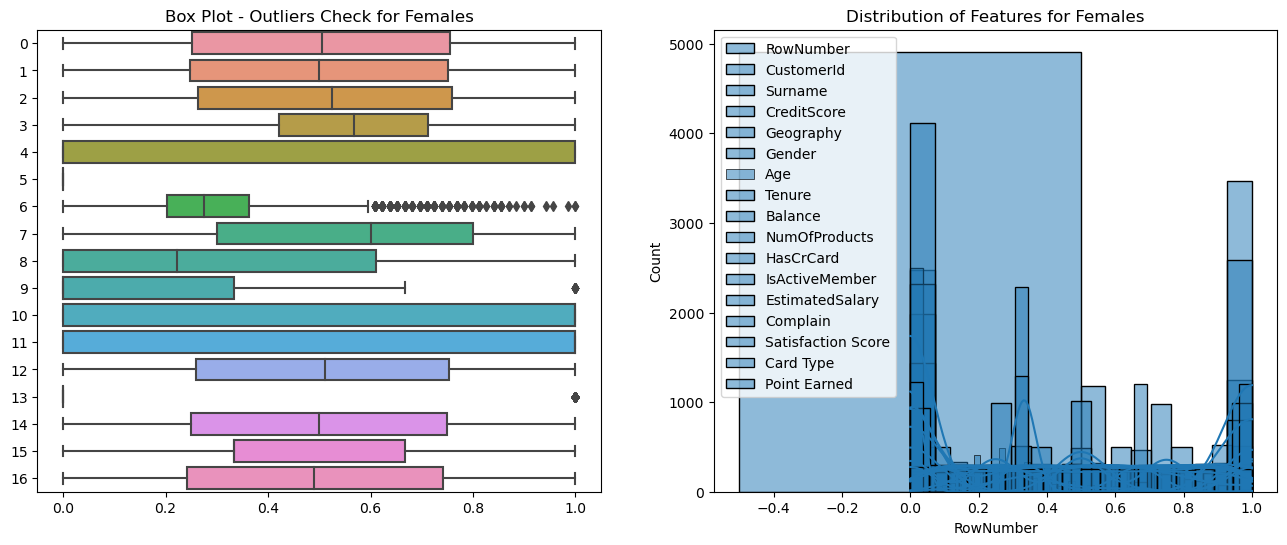

Normality Check and Outlier Counts for Females:
╒════════════════════╤═════════════════════════════════════════════════════════╤══════════════════╕
│ Feature            │ Result                                                  │   Outliers Count │
╞════════════════════╪═════════════════════════════════════════════════════════╪══════════════════╡
│ RowNumber          │ Data is scaled normally and doesn't have any outliers   │                0 │
├────────────────────┼─────────────────────────────────────────────────────────┼──────────────────┤
│ CustomerId         │ Data is scaled normally and doesn't have any outliers   │                0 │
├────────────────────┼─────────────────────────────────────────────────────────┼──────────────────┤
│ Surname            │ Data is scaled normally and doesn't have any outliers   │                0 │
├────────────────────┼─────────────────────────────────────────────────────────┼──────────────────┤
│ CreditScore        │ Data is scaled normally and d

In [16]:
# Initialising the MinMax scaling technique
min_max_scaler = MinMaxScaler()

# Applying MinMax scaling technique to the features for better analysis
X_train_male_scaled = min_max_scaler.fit_transform(X_train_male)
X_test_male_scaled = min_max_scaler.transform(X_test_male)

X_train_female_scaled = min_max_scaler.fit_transform(X_train_female)
X_test_female_scaled = min_max_scaler.transform(X_test_female)
def check_outliers_and_distribution(data, title, scaled=False):
    plt.figure(figsize=(16, 6))

    # Checking for the outliers using box plots for better understanding the situation
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data, orient='h')
    plt.title(f'Box Plot - Outliers Check for {title}')

    # Plotting feature distributions while converting the values to the orignal dataframe
    plt.subplot(1, 2, 2)
    if scaled:
        data = pd.DataFrame(data, columns=features)

    # Creating a list to store the results for better understanding
    results = []

    for feature in features:
        sns.histplot(data=data[feature], kde=True, label=feature)

        # Checking for normality (standard distribution) and outliers for further analysis
        normality_results = {}
        has_left_outliers = False
        has_right_outliers = False

        z_scores = stats.zscore(data[feature])
        left_outliers = any(z_scores < -3)  # Check for left-tail outliers
        right_outliers = any(z_scores > 3)  # Check for right-tail outliers

        if left_outliers and right_outliers:
            normality_result = "Data is not scaled normally and has both left and right tail outliers"
        elif left_outliers:
            normality_result = "Data is not scaled normally but has left tail outliers"
        elif right_outliers:
            normality_result = "Data is not scaled normally but has right tail outliers"
        else:
            normality_result = "Data is scaled normally and doesn't have any outliers"

        normality_results[feature] = normality_result

        # Counting the number of outliers for each feature for furhter analysis
        outliers_count = len(data[z_scores > 3]) + len(data[z_scores < -3])
        results.append([feature, normality_result, outliers_count])

    plt.legend()
    plt.title(f'Distribution of Features for {title}')
    plt.show()

    # Printing results in a tabular format for better understanding
    print(f"Normality Check and Outlier Counts for {title}:")
    print(tabulate(results, headers=["Feature", "Result", "Outliers Count"], tablefmt="fancy_grid"))

# Check outliers and distributions for male_data after MinMax scaling
check_outliers_and_distribution(X_train_male_scaled, "Males", scaled=True)

# Checking the outliers and distributions for female_data after MinMax scaling for further analysis
check_outliers_and_distribution(X_train_female_scaled, "Females", scaled=True)

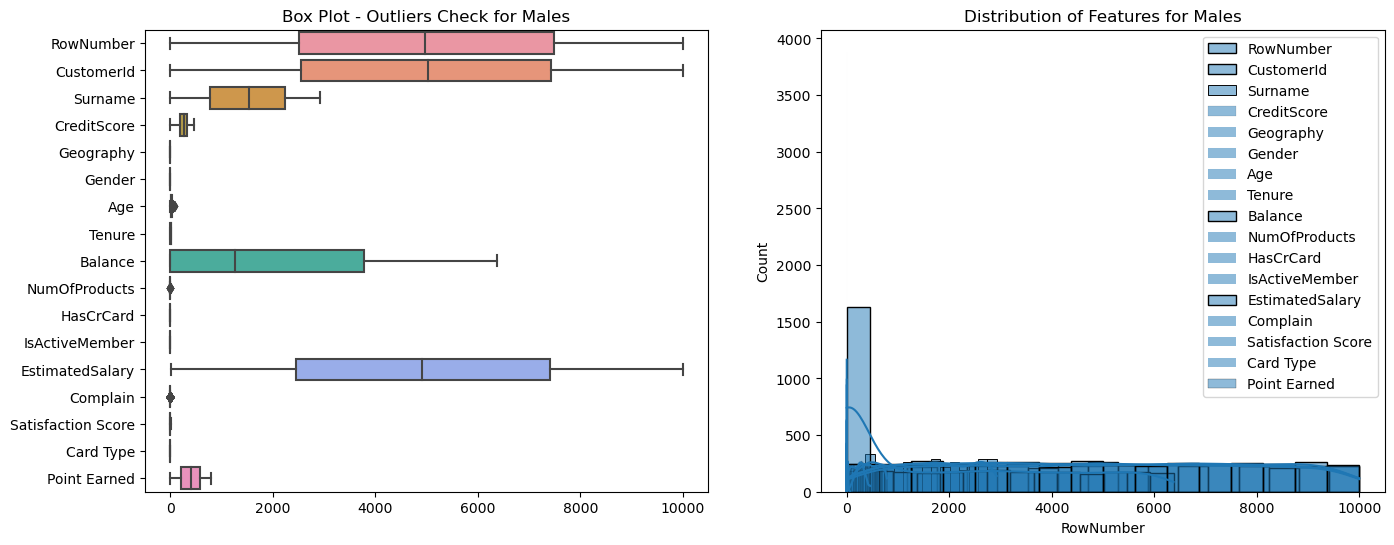

Normality Check and Outlier Counts for Males:
╒════════════════════╤═════════════════════════════════════════════════════════╤══════════════════╕
│ Feature            │ Result                                                  │   Outliers Count │
╞════════════════════╪═════════════════════════════════════════════════════════╪══════════════════╡
│ RowNumber          │ Data is scaled normally and doesn't have any outliers   │                0 │
├────────────────────┼─────────────────────────────────────────────────────────┼──────────────────┤
│ CustomerId         │ Data is scaled normally and doesn't have any outliers   │                0 │
├────────────────────┼─────────────────────────────────────────────────────────┼──────────────────┤
│ Surname            │ Data is scaled normally and doesn't have any outliers   │                0 │
├────────────────────┼─────────────────────────────────────────────────────────┼──────────────────┤
│ CreditScore        │ Data is scaled normally and doe

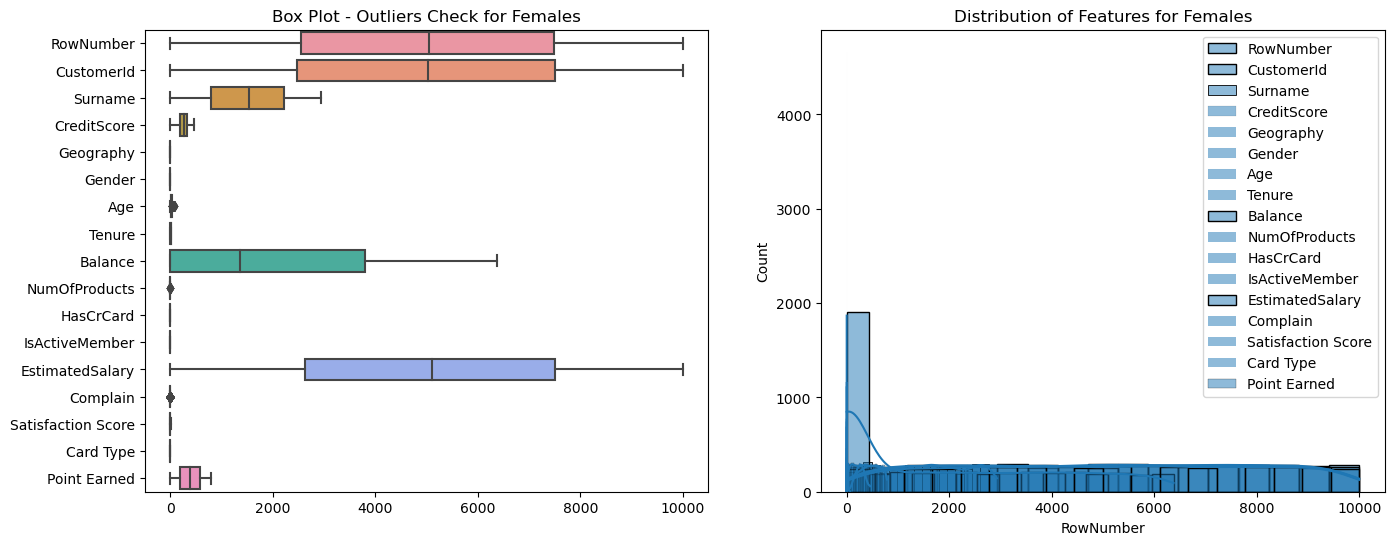

Normality Check and Outlier Counts for Females:
╒════════════════════╤═════════════════════════════════════════════════════════╤══════════════════╕
│ Feature            │ Result                                                  │   Outliers Count │
╞════════════════════╪═════════════════════════════════════════════════════════╪══════════════════╡
│ RowNumber          │ Data is scaled normally and doesn't have any outliers   │                0 │
├────────────────────┼─────────────────────────────────────────────────────────┼──────────────────┤
│ CustomerId         │ Data is scaled normally and doesn't have any outliers   │                0 │
├────────────────────┼─────────────────────────────────────────────────────────┼──────────────────┤
│ Surname            │ Data is scaled normally and doesn't have any outliers   │                0 │
├────────────────────┼─────────────────────────────────────────────────────────┼──────────────────┤
│ CreditScore        │ Data is scaled normally and d

In [18]:
# Initiallising the Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fitting the Isolation Forest to the male dset
iso_forest.fit(X_train_male)

# Predicting outliers for male data for furhter analysis
outliers_male = iso_forest.predict(X_train_male)

# Filtering the outliers in training dset
X_train_male = X_train_male[outliers_male != -1]
y_train_male = y_train_male[outliers_male != -1]

# Fitting the Isolation Forest to the female dset for further analysis
iso_forest.fit(X_train_female)

# Predicting outliers for female dset
outliers_female = iso_forest.predict(X_train_female)

# Filtering the outliers in train dset
X_train_female = X_train_female[outliers_female != -1]
y_train_female = y_train_female[outliers_female != -1]
# Function to check for outliers and plot distributions after Isolation Forest
def check_outliers_and_distribution(data, title, scaled=False):
    plt.figure(figsize=(16, 6))

    # Checking for outliers using box plots for better understanding
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data, orient='h')
    plt.title(f'Box Plot - Outliers Check for {title}')

    # Plotting feature distributions accordingly
    plt.subplot(1, 2, 2)

    # Creating a list to store the results
    results = []

    for feature in features:
        sns.histplot(data=data[feature], kde=True, label=feature)

        # Checking for normality (standard distribution) and outliers for furhter analysis
        normality_results = {}
        has_left_outliers = False
        has_right_outliers = False

        z_scores = stats.zscore(data[feature])
        left_outliers = any(z_scores < -3)  # Checking for left-tail outliers
        right_outliers = any(z_scores > 3)  # Checking for right-tail outliers

        if left_outliers and right_outliers:
            normality_result = "Data is not scaled normally and has both left and right tail outliers"
        elif left_outliers:
            normality_result = "Data is not scaled normally but has left tail outliers"
        elif right_outliers:
            normality_result = "Data is not scaled normally but has right tail outliers"
        else:
            normality_result = "Data is scaled normally and doesn't have any outliers"

        normality_results[feature] = normality_result

        # Counting the number of outliers for each feature for further analysis
        outliers_count = len(data[z_scores > 3]) + len(data[z_scores < -3])
        results.append([feature, normality_result, outliers_count])

    plt.legend()
    plt.title(f'Distribution of Features for {title}')
    plt.show()

    # Printing results in a tabular format for better understanding
    print(f"Normality Check and Outlier Counts for {title}:")
    print(tabulate(results, headers=["Feature", "Result", "Outliers Count"], tablefmt="fancy_grid"))

# Checking the outliers and distributions for male_data after Isolation Forest for furhter analysis
check_outliers_and_distribution(X_train_male, "Males", scaled=True)

# Checking the outliers and distributions for female_data after Isolation Forest for futher analysis
check_outliers_and_distribution(X_train_female, "Females", scaled=True)


In [19]:
# Creating dictionaries to store the outlier counts for furhter understanding
male_outliers = {"Total": {}}
female_outliers = {"Total": {}}

# Function to calculate outliers (defining it once again to avoid any unnecessary errors)
def calculate_outliers(data, title, results, scaled=False):
    total_outliers = 0
    for feature in features:
        if scaled:
            z_scores = stats.zscore(data[:, features.index(feature)])
        else:
            z_scores = stats.zscore(data[feature])
        outliers_count = len(data[(z_scores > 3) | (z_scores < -3)])
        results[feature] = results.get(feature, {})
        results[feature][title] = outliers_count
        total_outliers += outliers_count
    results["Total"][title] = total_outliers

# Applying MinMax Scaler to male and female dset for furhter analysis
calculate_outliers(X_train_male_scaled, "MinMaxScaler Males", male_outliers, scaled=True)
calculate_outliers(X_train_female_scaled, "MinMaxScaler Females", female_outliers, scaled=True)

# Applying Isolation Forest to male and female dset for furhter analysis
calculate_outliers(X_train_male, "IsolationForest Males", male_outliers)
calculate_outliers(X_train_female, "IsolationForest Females", female_outliers)

In [21]:
# Creating the DataFrames from the results
male_df = pd.DataFrame(male_outliers).T
female_df = pd.DataFrame(female_outliers).T
# printing the Summary table for Outlier Treatment
print("Males Summary Table:")
male_df.head()

Males Summary Table:


,MinMaxScaler Males,IsolationForest Males
Total,88,64
RowNumber,0,0
CustomerId,0,0
Surname,0,0
CreditScore,0,0


In [22]:
# printing the Summary table for Outlier Treatment
print("\nFemales Summary Table:")
female_df.head()


Females Summary Table:


,MinMaxScaler Females,IsolationForest Females
Total,90,81
RowNumber,0,0
CustomerId,0,0
Surname,0,0
CreditScore,0,0


In [24]:
# Function to calculate FPR and FNR (defining it oince againt o avoid unnecesary errors)
def calculate_fpr_fnr(y_true, y_pred, group_label):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    total_negatives = tn + fp
    total_positives = fn + tp

    fpr = fp / total_negatives
    fnr = fn / total_positives

    print(f"FPR for {group_label}: {fpr}")
    print(f"FNR for {group_label}: {fnr}")
    return fpr, fnr

# Loading the dataset Once again
data = df

for feature in features:
    male_data[feature] = label_encoder.fit_transform(male_data[feature])
    female_data[feature] = label_encoder.fit_transform(female_data[feature])

# Splitting the data into training and testing sets (90% training, 10% testing)
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(male_data[features], male_data[target], test_size=0.10, random_state=42)
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(female_data[features], female_data[target], test_size=0.10, random_state=42)

# Initiallising the Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fitting the Isolation Forest to the male dset
iso_forest.fit(X_train_male)

# Predicting outliers for male dset
outliers_male = iso_forest.predict(X_train_male)

# Filtering the outliers
X_train_male = X_train_male[outliers_male != -1]
y_train_male = y_train_male[outliers_male != -1]

# Fitting the Isolation Forest to the female data for further analysis
iso_forest.fit(X_train_female)

# Predicting outliers for female data
outliers_female = iso_forest.predict(X_train_female)

# Filtering the outliers
X_train_female = X_train_female[outliers_female != -1]
y_train_female = y_train_female[outliers_female != -1]

# Model training (SVM, Random Forest, Gradient Boosting) with default parameters for Males as default showed the best results
svm_model_male = SVC()
rf_model_male = RandomForestClassifier()
gb_model_male = GradientBoostingClassifier()

svm_model_male.fit(X_train_male, y_train_male)
rf_model_male.fit(X_train_male, y_train_male)
gb_model_male.fit(X_train_male, y_train_male)

# Predicting on the test set for Males
svm_male_pred = svm_model_male.predict(X_test_male)
rf_male_pred = rf_model_male.predict(X_test_male)
gb_male_pred = gb_model_male.predict(X_test_male)

# Calculating accuracy for Males
svm_male_accuracy = accuracy_score(y_test_male, svm_male_pred)
rf_male_accuracy = accuracy_score(y_test_male, rf_male_pred)
gb_male_accuracy = accuracy_score(y_test_male, gb_male_pred)

# Model training (SVM, Random Forest, Gradient Boosting) with default parameters for Females as default showed the best results
svm_model_female = SVC()
rf_model_female = RandomForestClassifier()
gb_model_female = GradientBoostingClassifier()

svm_model_female.fit(X_train_female, y_train_female)
rf_model_female.fit(X_train_female, y_train_female)
gb_model_female.fit(X_train_female, y_train_female)

# Predicting on the test set for Females
svm_female_pred = svm_model_female.predict(X_test_female)
rf_female_pred = rf_model_female.predict(X_test_female)
gb_female_pred = gb_model_female.predict(X_test_female)

# Calculating accuracy for Females
svm_female_accuracy = accuracy_score(y_test_female, svm_female_pred)
rf_female_accuracy = accuracy_score(y_test_female, rf_female_pred)
gb_female_accuracy = accuracy_score(y_test_female, gb_female_pred)

# Formatting accuracy to percentages with 2 decimal places
svm_male_accuracy_percentage = round(svm_male_accuracy * 100, 2)
rf_male_accuracy_percentage = round(rf_male_accuracy * 100, 2)
gb_male_accuracy_percentage = round(gb_male_accuracy * 100, 2)

svm_female_accuracy_percentage = round(svm_female_accuracy * 100, 2)
rf_female_accuracy_percentage = round(rf_female_accuracy * 100, 2)
gb_female_accuracy_percentage = round(gb_female_accuracy * 100, 2)

# Calculating FPR and FNR for SVM in both groups
fpr_male_svm, fnr_male_svm = calculate_fpr_fnr(y_test_male, svm_male_pred, "Males")
fpr_female_svm, fnr_female_svm = calculate_fpr_fnr(y_test_female, svm_female_pred, "Females")

# Calculating FPR and FNR for Random Forest in both groups
fpr_male_rf, fnr_male_rf = calculate_fpr_fnr(y_test_male, rf_male_pred, "Males")
fpr_female_rf, fnr_female_rf = calculate_fpr_fnr(y_test_female, rf_female_pred, "Females")

# Calculating FPR and FNR for Gradient Boosting in both groups
fpr_male_gb, fnr_male_gb = calculate_fpr_fnr(y_test_male, gb_male_pred, "Males")
fpr_female_gb, fnr_female_gb = calculate_fpr_fnr(y_test_female, gb_female_pred, "Females")

# Table 1: Displays the Model Accuracies for Males and Females all together
table1 = [["Model", "Males", "Females"],
         ["SVM", svm_male_accuracy_percentage, svm_female_accuracy_percentage],
         ["Random Forest", rf_male_accuracy_percentage, rf_female_accuracy_percentage],
         ["Gradient Boosting", gb_male_accuracy_percentage, gb_female_accuracy_percentage]]

# Printing the 1st table for better understanding
print('')
print("Table 1: Model Accuracies for Males and Females")
print('')
print(tabulate(table1, headers="firstrow", tablefmt="fancy_grid"))

# Table 2: Dispalying the results for False Positive Rate (FPR) and False Negative Rate (FNR) for Different Models and Groups
table2 = [
    ["Model", "Group", "FPR", "FNR"],
    ["SVM", "Males", round(fpr_male_svm, 2), round(fnr_male_svm, 2)],
    ["SVM", "Females", round(fpr_female_svm, 2), round(fnr_female_svm, 2)],
    ["Random Forest", "Males", round(fpr_male_rf, 2), round(fnr_male_rf, 2)],
    ["Random Forest", "Females", round(fpr_female_rf, 2), round(fnr_female_rf, 2)],
    ["Gradient Boosting", "Males", round(fpr_male_gb, 2), round(fnr_male_gb, 2)],
    ["Gradient Boosting", "Females", round(fpr_female_gb, 2), round(fnr_female_gb, 2)],
]

# Printing the 2nd table for beter understanding
print('')
print("Table 2: False Positive Rate (FPR) and False Negative Rate (FNR) for Different Models and Groups")
print('')
print(tabulate(table2, headers="firstrow", tablefmt="fancy_grid"))

# Calculating the Disparate Mistreatment in both groups for each algorithm at once
disparate_mistreatment_svm = {
    "SVM": abs(fpr_male_svm - fpr_female_svm) + abs(fnr_male_svm - fnr_female_svm)
}

disparate_mistreatment_rf = {
    "Random Forest": abs(fpr_male_rf - fpr_female_rf) + abs(fnr_male_rf - fnr_female_rf)
}

disparate_mistreatment_gb = {
    "Gradient Boosting": abs(fpr_male_gb - fpr_female_gb) + abs(fnr_male_gb - fnr_female_gb)
}

# Table 3: Displays the Disparate Mistreatment Values for Different Models all together
table3 = []
table3.append(["Model", "Disparate Mistreatment"])

# Adding the values for SVM/SVC
table3.append(["SVM", round(disparate_mistreatment_svm['SVM'], 2)])

# Adding the values for Random Forest Classifier
table3.append(["Random Forest", round(disparate_mistreatment_rf['Random Forest'], 2)])

# Adding the values for Gradient Boosting Classifier
table3.append(["Gradient Boosting", round(disparate_mistreatment_gb['Gradient Boosting'], 2)])

# Printing the 3rd table for better understanding
print('')
print("Table 3: Disparate Mistreatment Values for Different Models")
print('')
print(tabulate(table3, headers="firstrow", tablefmt="fancy_grid"))

FPR for Males: 0.0
FNR for Males: 1.0
FPR for Females: 0.0
FNR for Females: 1.0
FPR for Males: 0.0
FNR for Males: 0.008403361344537815
FPR for Females: 0.0022222222222222222
FNR for Females: 0.010416666666666666
FPR for Males: 0.0
FNR for Males: 0.01680672268907563
FPR for Females: 0.0022222222222222222
FNR for Females: 0.020833333333333332

Table 1: Model Accuracies for Males and Females

╒═══════════════════╤═════════╤═══════════╕
│ Model             │   Males │   Females │
╞═══════════════════╪═════════╪═══════════╡
│ SVM               │   73.85 │     82.42 │
├───────────────────┼─────────┼───────────┤
│ Random Forest     │   99.78 │     99.63 │
├───────────────────┼─────────┼───────────┤
│ Gradient Boosting │   99.56 │     99.45 │
╘═══════════════════╧═════════╧═══════════╛

Table 2: False Positive Rate (FPR) and False Negative Rate (FNR) for Different Models and Groups

╒═══════════════════╤═════════╤═══════╤═══════╕
│ Model             │ Group   │   FPR │   FNR │
╞═══════════════